# Spacetime


author: steeve.laquitaine@epfl.ch  
date: 2023.10.13  
last modified: 01.02.2024

Purpose: describe multi-channel spatio-temporal dynamics of action potentials, in vivo.


## Setup

create and activate env from `spikinterf.txt`

In [2]:
# listen to changes
%load_ext autoreload
%autoreload 2

import os
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np 
import spikeinterface as si

# set project path
PROJ_PATH = "/gpfs/bbp.cscs.ch/project/proj85/home/laquitai/spikebias/"
os.chdir(PROJ_PATH)

from src.nodes.utils import get_config

# SETUP PARAMETERS
SAMPFREQ = 20000  # hz

# silico
data_conf, param_conf_sili = get_config(
    "vivo_horvath", "probe_2"
).values()
PREPRO_PATH = data_conf["preprocessing"]["output"]["trace_file_path"]


# FIGURE SETTINGS
FIGSIZE = (1.05, 2.10)
# colors
COLOR_V = [0.4, 0.4, 0.4]
# axes
plt.rcParams["font.family"] = "Arial"
plt.rcParams["font.size"] = 6  # 5-7 with Nature neuroscience as reference
plt.rcParams["lines.linewidth"] = 0.3
plt.rcParams["axes.linewidth"] = 0.3  # 1
plt.rcParams["axes.spines.top"] = False
plt.rcParams["xtick.major.width"] = 0.3  # 0.8 #* 1.3
plt.rcParams["xtick.minor.width"] = 0.3  # 0.8 #* 1.3
plt.rcParams["ytick.major.width"] = 0.3  # 0.8 #* 1.3
plt.rcParams["ytick.minor.width"] = 0.3  # 0.8 #* 1.3
plt.rcParams["xtick.major.size"] = 3.5 * 1.1
plt.rcParams["xtick.minor.size"] = 2 * 1.1
plt.rcParams["ytick.major.size"] = 3.5 * 1.1
plt.rcParams["ytick.minor.size"] = 2 * 1.1
# legend
savefig_cfg = {"transparent": True, "dpi": 300}
legend_cfg = {"frameon": False, "handletextpad": 0.1}
tight_layout_cfg = {"pad": 0.5}
LG_FRAMEON = False  # no legend frame

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
2024-06-18 14:34:42,868 - root - utils.py - get_config - INFO - Reading experiment config.
2024-06-18 14:34:42,878 - root - utils.py - get_config - INFO - Reading experiment config. - done


### Custom

In [22]:
def plot_probe(Recording):
    Probe = Recording.get_probe()

    # plot file contact with ids
    fig, ax = plt.subplots(1, 1, figsize=(4, 10))
    ax.plot(
        Probe.contact_positions[:, 0],
        Probe.contact_positions[:, 1],
        "o",
        markerfacecolor="w",
        color="k",
        markersize=6,
    )
    for ix in range(len(Probe.contact_positions)):
        if ix % 1 == 0:
            ax.text(
                Probe.contact_positions[ix, 0],
                Probe.contact_positions[ix, 1],
                "%s" % (str(Recording.channel_ids[ix])),
                size=12,
                zorder=100,
                color="r",
            )
    ax.set_xlabel("x", fontsize=20)
    ax.set_ylabel("y", fontsize=20)

    # highlight order
    # first site
    ax.plot(
        Probe.contact_positions[0, 0],
        Probe.contact_positions[0, 1],
        "ro",
        markersize=10,
    )

    # highlight order
    # second site
    ax.plot(
        Probe.contact_positions[1, 0],
        Probe.contact_positions[1, 1],
        "bo",
        markersize=10,
    )

    # highlight order
    # third site
    ax.plot(
        Probe.contact_positions[2, 0],
        Probe.contact_positions[2, 1],
        "go",
        markersize=10,
    )

### Get channel layout

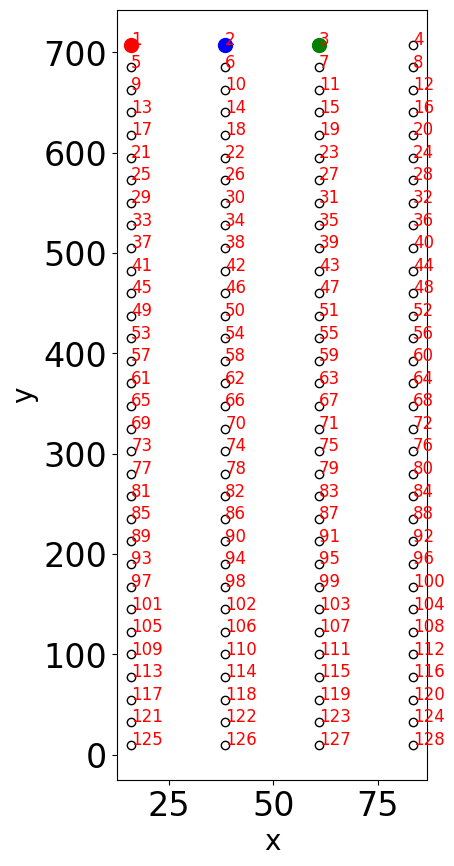

In [52]:
# get preprocessed
Recording = si.load_extractor(PREPRO_PATH)

# get layers
layers = Recording.get_property("layers")
col1_site_ix = np.arange(0, len(layers), 4)
col1_site_layers = layers[col1_site_ix]

# from bottom to top on the plot
col1_site_layers = np.flip(col1_site_layers)

# get layers layout
col1_site_out = np.where(col1_site_layers == "Outside")[0]
col1_site_l1 = np.where(col1_site_layers == "L1")[0]
col1_site_l2_3 = np.where((col1_site_layers == "L2_3"))[0]
col1_site_l4 = np.where(col1_site_layers == "L4")[0]
col1_site_l5 = np.where(col1_site_layers == "L5")[0]
col1_site_l6 = np.where(col1_site_layers == "L6")[0]

plot_probe(Recording)

In [55]:
col1_site_layers

array(['L6', 'L6', 'L6', 'L5', 'L5', 'L5', 'L5', 'L5', 'L5', 'L5', 'L5',
       'L5', 'L5', 'L5', 'L5', 'L5', 'L5', 'L5', 'L5', 'L5', 'L5', 'L5',
       'L5', 'L5', 'L5', 'L4', 'L4', 'L4', 'L4', 'L4', 'L2_3', 'L2_3'],
      dtype='<U4')

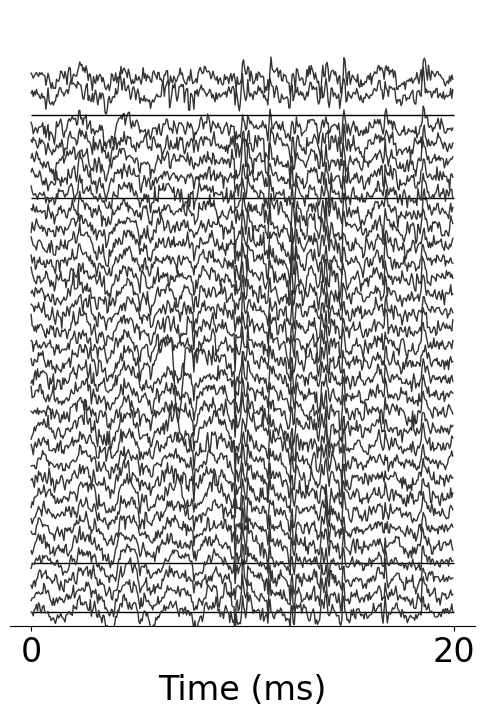

In [69]:
# takes 5 secs

# plot
NUM = 1400  # 1400, 76, 1200, 10, 14, 46, 53, 61, 500,
NUM = 4
LINEWIDTH = 1
PLOT_Y_PITCH = 100
DURATION = 20  # 20  # in ms, 46
n_timepoints = int(DURATION * SAMPFREQ / 1000)
PERIOD = np.arange((NUM - 1) * n_timepoints, NUM * n_timepoints, 1)
nsite_per_col = len(col1_site_layers)
Y_MAX = PLOT_Y_PITCH * (nsite_per_col - 1)

prep_traces = Recording.get_traces()
n_contacts = prep_traces.shape[1]

# plot 384 contacts x 5 ms (like Trautmann et al 2023)

# plot (0: bottom 96:top)
fig, ax = plt.subplots(1, 1, figsize=FIGSIZE)
pos_up = 0
row = 0
for contact_i in np.arange(0, nsite_per_col + 1, 1):
    # mark the first trace of each layer
    # layer 6
    if contact_i == col1_site_l6[0]:
        ax.hlines(
            y=0.99 * pos_up, xmin=0, xmax=n_timepoints, color="black", linewidth=1
        )

    # layer 5
    if contact_i == col1_site_l5[0]:
        ax.hlines(
            y=0.99 * pos_up, xmin=0, xmax=n_timepoints, color="black", linewidth=1
        )

    # layer 4
    if contact_i == col1_site_l4[0]:
        ax.hlines(
            y=0.99 * pos_up, xmin=0, xmax=n_timepoints, color="black", linewidth=1
        )

    # layer 2/3
    if contact_i == col1_site_l2_3[0]:
        ax.hlines(
            y=0.99 * pos_up, xmin=0, xmax=n_timepoints, color="black", linewidth=1
        )

    # all other traces
    else:
        ax.plot(
            prep_traces[PERIOD, contact_i] + pos_up,
            linewidth=LINEWIDTH,
            color=COLOR_VIVO,
        )
    pos_up += PLOT_Y_PITCH

ax.spines[["left", "right", "top"]].set_visible(False)
ax.set_xticks([0, n_timepoints])
ax.set_xticklabels([0, 20])
ax.set_xlabel("Time (ms)")
ax.set_ylim([-80, Y_MAX + 500])
plt.yticks([])

# save figures
# plt.savefig(
#     "figures/2_realism/2_dynamics/svg/horvath/horvath_vivo_dynamics.svg", **savefig_cfg
# )